In [6]:
import sys
import os
sys.path.append('/global/u2/c/caditi97/exatrkx-ctd2020')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from utils_robust import *

In [17]:
def neighborhood(hits, truth, neighbors, noise_keep, k):
    
    hitidx = neighbors[k]
    hitids = hits.iloc[hitidx]['hit_id'].values
    sel_hits = hits[hits['hit_id'].isin(hitids)]
   
    
    #noise in neighborhood
    truth_np = np.array(truth.values)
    noise_ids = []
    for i in hitidx:
            if truth_np[i, 1] == 0: noise_ids.append(truth_np[i, 0])
    noise_in = hits[hits['hit_id'].isin(noise_ids)]
    
    return noise_in, sel_hits

In [76]:
import random
def random_neighborhood():
    feature_names = ['x', 'y', 'z', 'cell_count', 'cell_val', 'leta', 'lphi', 'lx', 'ly', 'lz', 'geta', 'gphi']
    noise_keeps = ["0", "0.2", "0.4", "0.6", "0.8", "1"]
    radius = 0.4
    fig1, axes1 = plt.subplots(2, 3, figsize=(16,10))
    avg_ratio = []
    total_noise = []
    for i,noise_keep in enumerate(noise_keeps):
        hits, truth, emb_model, filter_model = get_data(noise_keep)
        unique_ids = truth.particle_id.unique()
        track_ids_to_keep = unique_ids[np.where(unique_ids != 0)]
        where_to_keep = truth['particle_id'].isin(track_ids_to_keep)
        not_noise  = hits[where_to_keep]
        noise = hits[~where_to_keep]
        
        t_noise = len(noise)/len(hits)
        total_noise.append(t_noise)
        print("Not Noise Hits = " + str(len(not_noise)))
        print("Noise Hits = " + str(len(noise)))
        neighbors = get_emb_neighbors(hits[feature_names].values, emb_model, radius)

        ratios = []
        
        #np.random.seed(0)
        for j in tqdm(range(5000)):
            k = np.random.choice(not_noise.index.values.astype(int))
            n_in, h_in = neighborhood(hits, truth, neighbors, noise_keep, k)
            r = len(n_in) / len(h_in)
            ratios.append(r)
        print("mean = " + str(statistics.mean(ratios)))
        avg_ratio.append(statistics.mean(ratios))
        print("----------")
        
        (counts, bins) = np.histogram(ratios,bins=50)
        factor = 1/5000
        axes1[i//3][i%3].hist(bins[:-1], bins, weights=factor*counts)
    return avg_ratio, total_noise
        

noise: 0 number of hits: 52482
Not Noise Hits = 52482
Noise Hits = 0


100%|██████████| 5000/5000 [00:16<00:00, 305.43it/s]


mean = 0.0
----------
noise: 0.2 number of hits: 55094
Not Noise Hits = 52482
Noise Hits = 2612


100%|██████████| 5000/5000 [00:19<00:00, 252.71it/s]


mean = 0.04575322866614998
----------
noise: 0.4 number of hits: 57699
Not Noise Hits = 52482
Noise Hits = 5217


100%|██████████| 5000/5000 [00:21<00:00, 236.58it/s]


mean = 0.08715480745298912
----------
noise: 0.6 number of hits: 60314
Not Noise Hits = 52482
Noise Hits = 7832


100%|██████████| 5000/5000 [00:22<00:00, 225.00it/s]


mean = 0.1245636364191774
----------
noise: 0.8 number of hits: 62859
Not Noise Hits = 52482
Noise Hits = 10377


100%|██████████| 5000/5000 [00:22<00:00, 217.95it/s]


mean = 0.15779285927636266
----------
noise: 1 number of hits: 65518
Not Noise Hits = 52482
Noise Hits = 13036


100%|██████████| 5000/5000 [00:23<00:00, 209.16it/s]


mean = 0.18945267612014072
----------


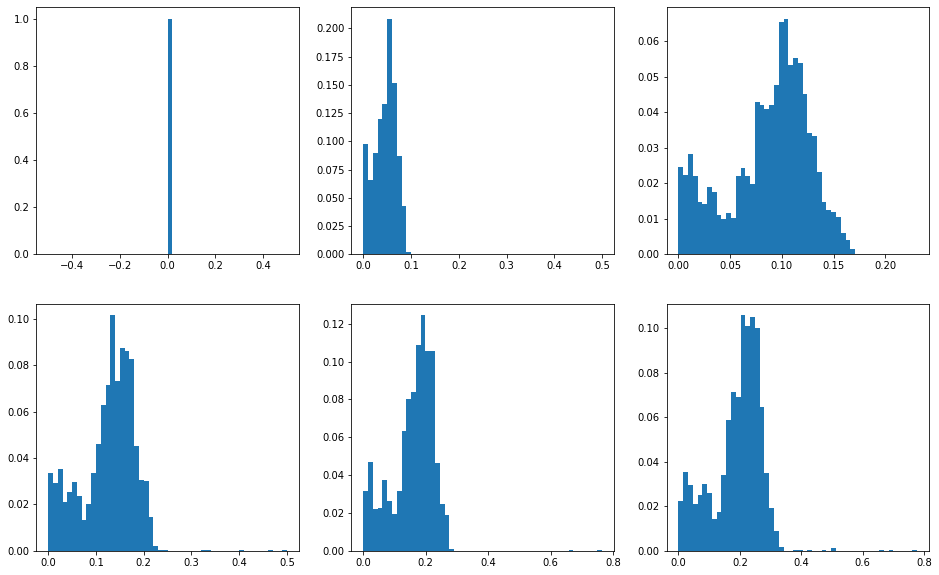

In [77]:
a,b = random_neighborhood()

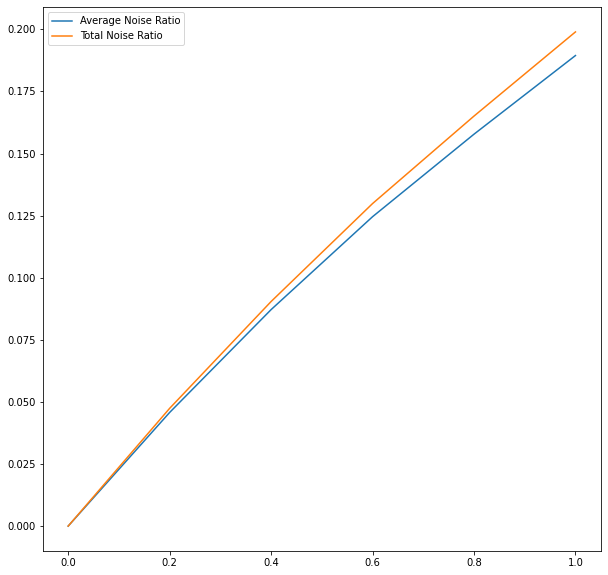

In [78]:
noise_keeps = ["0", "0.2", "0.4", "0.6", "0.8", "1"]
fig, ax1 = plt.subplots(1, 1, figsize=(10,10))
x = [float(keep) for keep in noise_keeps]
ax1.plot(x,a, label="Average Noise Ratio")
ax1.plot(x,b, label="Total Noise Ratio")
plt.legend()
plt.show()
    

noise: 0 number of hits: 52482


100%|██████████| 52482/52482 [01:03<00:00, 831.90it/s] 


noise: 0.2 number of hits: 55094


100%|██████████| 55094/55094 [01:09<00:00, 792.13it/s] 


noise: 0.4 number of hits: 57699


100%|██████████| 57699/57699 [01:19<00:00, 723.90it/s] 


noise: 0.6 number of hits: 60314


100%|██████████| 60314/60314 [01:25<00:00, 707.72it/s] 


noise: 0.8 number of hits: 62859


100%|██████████| 62859/62859 [01:32<00:00, 679.51it/s] 


noise: 1 number of hits: 65518


100%|██████████| 65518/65518 [01:42<00:00, 638.45it/s] 


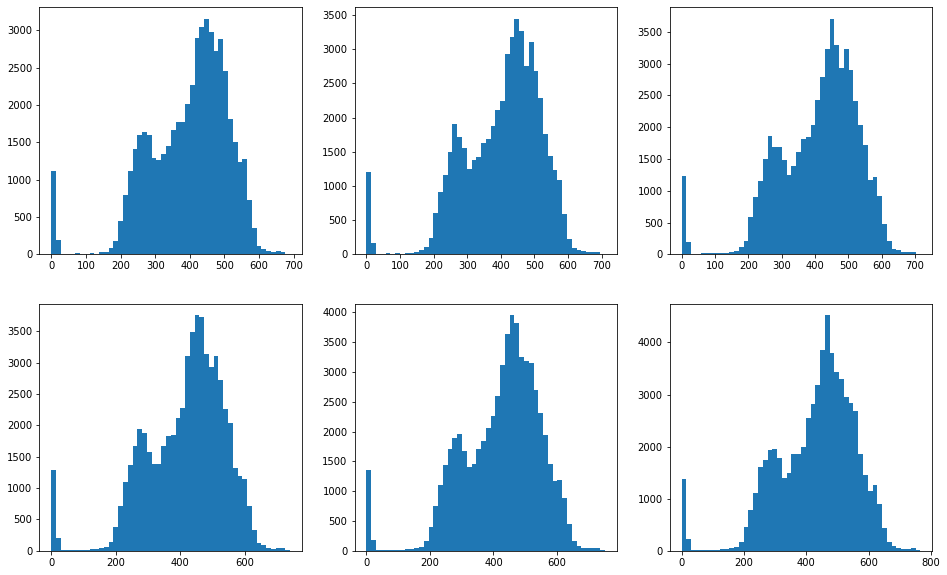

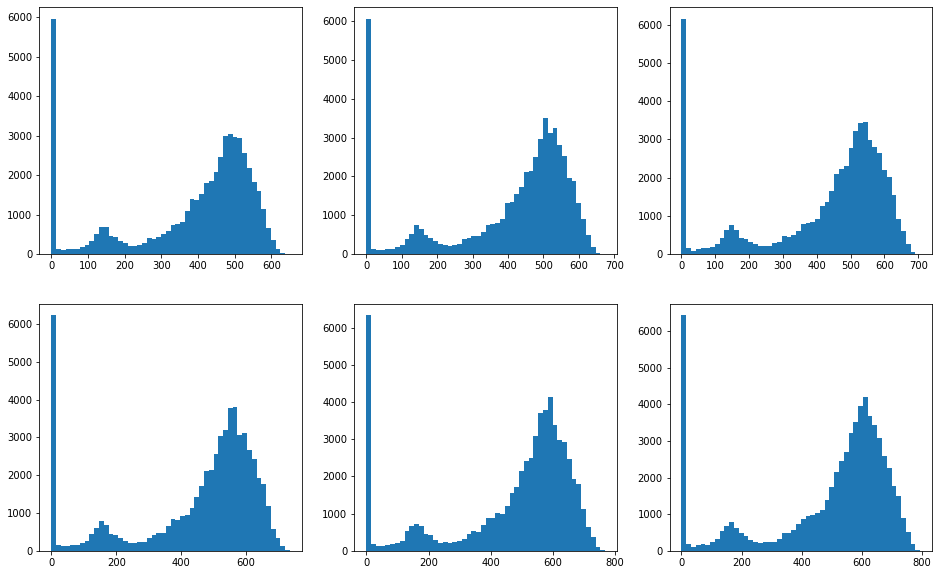

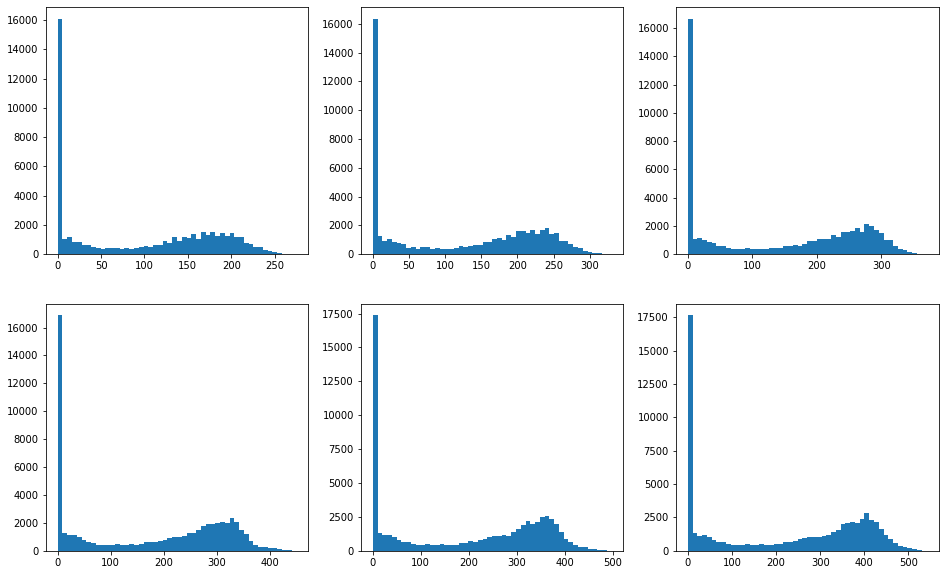

In [69]:
feature_names = ['x', 'y', 'z', 'cell_count', 'cell_val', 'leta', 'lphi', 'lx', 'ly', 'lz', 'geta', 'gphi']
noise_keeps = ["0", "0.2", "0.4", "0.6", "0.8", "1"]
radius = 0.4

fig1, axes1 = plt.subplots(2, 3, figsize=(16,10))
fig2, axes2 = plt.subplots(2, 3, figsize=(16,10))
fig3, axes3 = plt.subplots(2, 3, figsize=(16,10))

for i,noise_keep in enumerate(noise_keeps):
    hits, truth, emb_model, filter_model = get_data(noise_keep)
    np_hits = np.array(hits.values)

    neighbors = get_emb_neighbors(hits[feature_names].values, emb_model, radius)
    
    vols8 = []
    vols13 = []
    vols17 = []
    
    #for each hitidx
    for k in tqdm(range(len(hits))):
        vol8 = 0
        vol13 = 0
        vol17 = 0
        #get hits inside neighborhood
        hitidx = neighbors[k]
        for idx in hitidx:
            hit = np_hits[idx]
            if (hit[4] == 8):
                vol8+=1
            if (hit[4] == 13):
                vol13+=1
            if (hit[4] == 17):
                vol17+=1
        vols8.append(vol8)
        vols13.append(vol13)
        vols17.append(vol17)
#         print("Result: Vol8 = " +str(vol8)+ " Vol13 = " +str(vol13)+ " Vol17 = " +str(vol17))

    axes1[i//3][i%3].hist(vols8,50)
    axes2[i//3][i%3].hist(vols13,50)
    axes3[i//3][i%3].hist(vols17,50)
    


In [64]:
hits, truth, emb_model, filter_model = get_data(0.2)
neighbors = get_emb_neighbors(hits[feature_names].values, emb_model, 0.4)
hitidx = neighbors[0]
np_hits = np.array(hits.values)
hood = []
n = 0
for idx in hitidx:
    hood = np_hits[idx]
    if(hood[4] == 17):
        n+=1


noise: 0.2 number of hits: 55094


In [65]:
n

0

In [49]:
hood[0][0]

78739.0